In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load dataset
df = pd.read_csv('dataset.csv')  
df.drop('Customer_ID', axis=1, inplace=True)

In [20]:
df.head()

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [ ]:
df.info()

df.describe(include='all')

print(df['Target_Churn'].value_counts(normalize=True))  # assuming 'Churn' is the target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1000 non-null   int64  
 1   Gender                      1000 non-null   object 
 2   Annual_Income               1000 non-null   float64
 3   Total_Spend                 1000 non-null   float64
 4   Years_as_Customer           1000 non-null   int64  
 5   Num_of_Purchases            1000 non-null   int64  
 6   Average_Transaction_Amount  1000 non-null   float64
 7   Num_of_Returns              1000 non-null   int64  
 8   Num_of_Support_Contacts     1000 non-null   int64  
 9   Satisfaction_Score          1000 non-null   int64  
 10  Last_Purchase_Days_Ago      1000 non-null   int64  
 11  Email_Opt_In                1000 non-null   bool   
 12  Target_Churn                1000 non-null   bool   
 13  Promo_Responded             1000 n

In [28]:
df.isna().sum()

Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Target_Churn                  0
Promo_Responded               0
Promo_Unsubscribed            0
dtype: int64

# Target Distribution

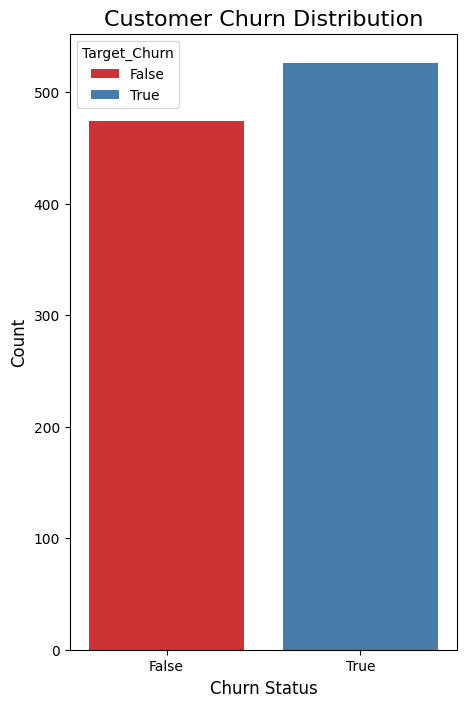

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot with custom colors
plt.figure(figsize=(5, 8))
sns.countplot(x='Target_Churn', data=df, hue='Target_Churn', palette='Set1')

# Add titles and labels
plt.title('Customer Churn Distribution', fontsize=16)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

# Categorical Feature vs Churn

Churn Rate by Gender:
Gender
Female    0.523392
Male      0.505988
Other     0.549383
Name: Target_Churn, dtype: float64

Churn Rate by Email_Opt_In:
Email_Opt_In
False    0.526539
True     0.525520
Name: Target_Churn, dtype: float64

Churn Rate by Promo_Responded:
Promo_Responded
False    0.521148
True     0.535503
Name: Target_Churn, dtype: float64



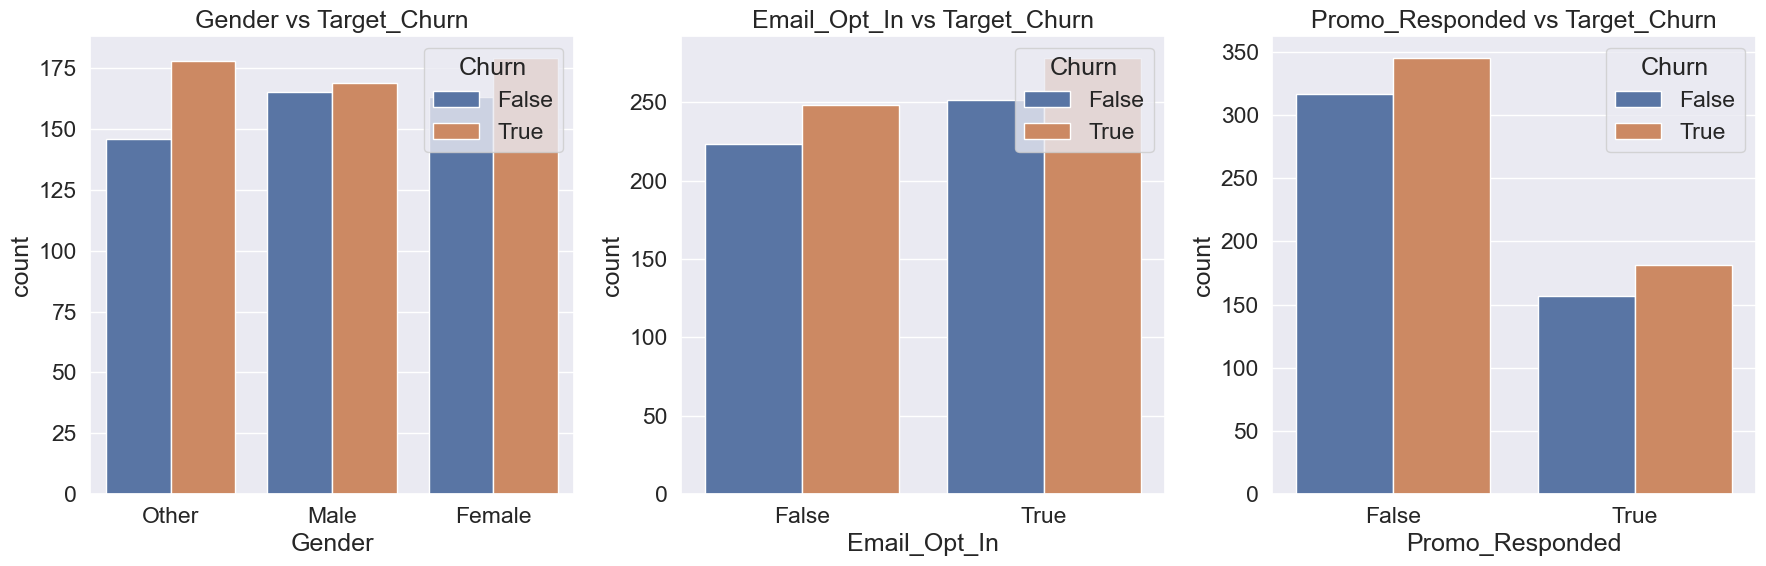

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical columns
categorical_cols = ['Gender', 'Email_Opt_In', 'Promo_Responded']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

# Loop through each categorical column and plot in subplots
for i, col in enumerate(categorical_cols):
    ax = axes[i]  
    sns.countplot(data=df, x=col, hue='Target_Churn', ax=ax) 
    ax.set_title(f'{col} vs Target_Churn')
    ax.legend(title='Churn')

    # Churn rate by category
    churn_by_cat = df.groupby(col)['Target_Churn'].mean()
    print(f"Churn Rate by {col}:\n{churn_by_cat}\n")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Numerical Features Distribution

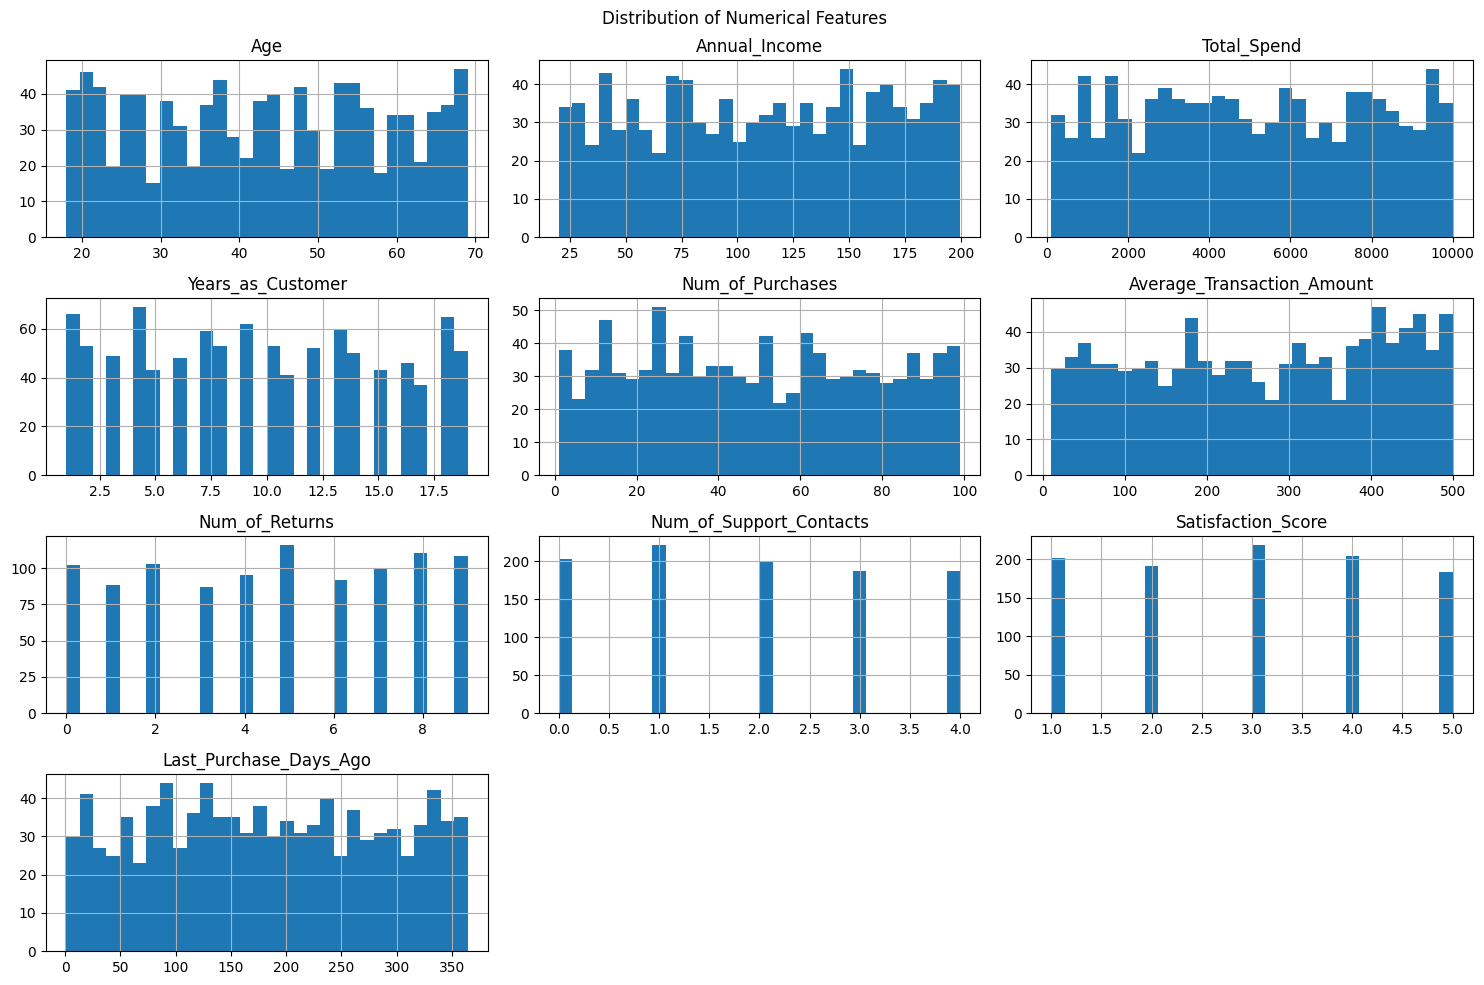

In [15]:
numeric_cols = df.select_dtypes(include=[np.number, 'bool']).drop(['Target_Churn'], axis=1).columns

df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

# Outlier Detection

- Age
- Annual_Income
- Total_Spend
- Years_as_Customer


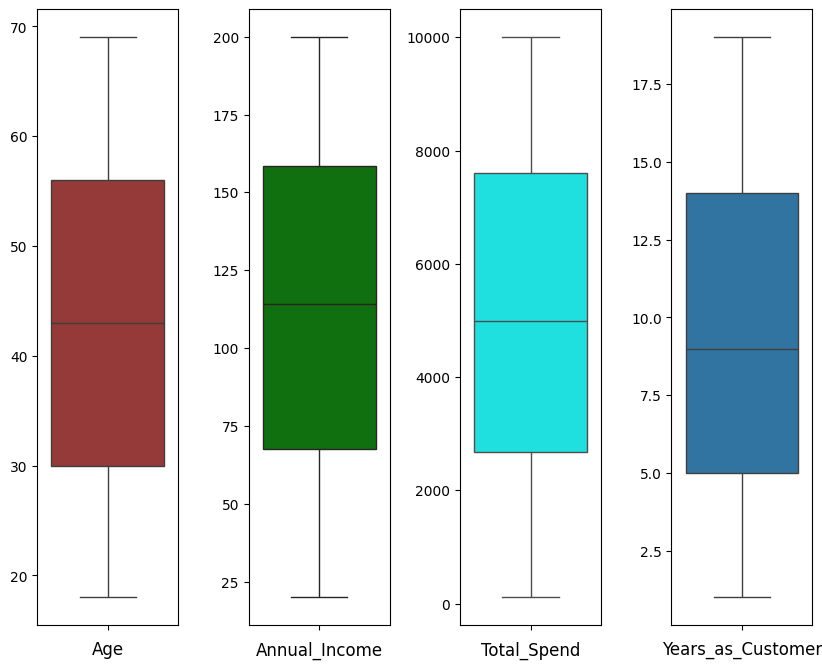

In [ ]:
# Create 4 graphs
fig, ax = plt.subplots(1, 4, figsize=(10, 8))
 
# Create space between the plots
plt.subplots_adjust(wspace=0.5) 
 
# Plot boxplot for Age 
sns.boxplot(data = df['Age'], ax = ax[0], color ='brown')
ax[0].set_xlabel('Age', fontsize = 12)
ax[0].set_ylabel('')
 
# Plot boxplot for Annual_Income 
sns.boxplot(data = df['Annual_Income'], ax = ax[1], color = 'g')
ax[1].set_xlabel('Annual_Income', fontsize = 12)
ax[1].set_ylabel('')
 
# Plot boxplot for Total_Spend 
sns.boxplot(data = df['Total_Spend'], ax = ax[2], color = 'cyan')
ax[2].set_xlabel('Total_Spend', fontsize = 12)
ax[2].set_ylabel('')
 
# Plot boxplot for Years_as_Customer 
sns.boxplot(data = df['Years_as_Customer'], ax = ax[3])
ax[3].set_xlabel('Years_as_Customer', fontsize = 12)
ax[3].set_ylabel('')
 

for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

- Satisfaction_Score 
- Last_Purchase_Days_Ago
- Num_of_Returns

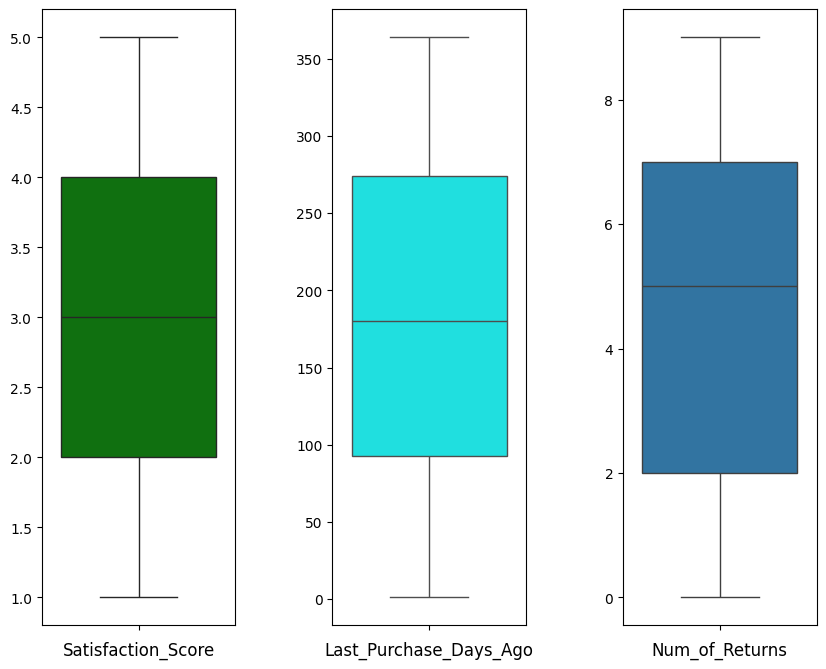

In [ ]:
# Create 3 graphs
fig, ax = plt.subplots(1, 3, figsize=(10, 8))
 
# Create space between the plots
plt.subplots_adjust(wspace=0.5) 
 
# Plot boxplot for Satisfaction_Score 
sns.boxplot(data = df['Satisfaction_Score'], ax = ax[0], color = 'g')
ax[0].set_xlabel('Satisfaction_Score', fontsize = 12)
ax[0].set_ylabel('')
 
# Plot boxplot for Last_Purchase_Days_Ago 
sns.boxplot(data = df['Last_Purchase_Days_Ago'], ax = ax[1], color = 'cyan')
ax[1].set_xlabel('Last_Purchase_Days_Ago', fontsize = 12)
ax[1].set_ylabel('')
 
# Plot boxplot for Years_as_Customer 
sns.boxplot(data = df['Num_of_Returns'], ax = ax[2])
ax[2].set_xlabel('Num_of_Returns', fontsize = 12)
ax[2].set_ylabel('')
 

for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

# Correlation Matrix

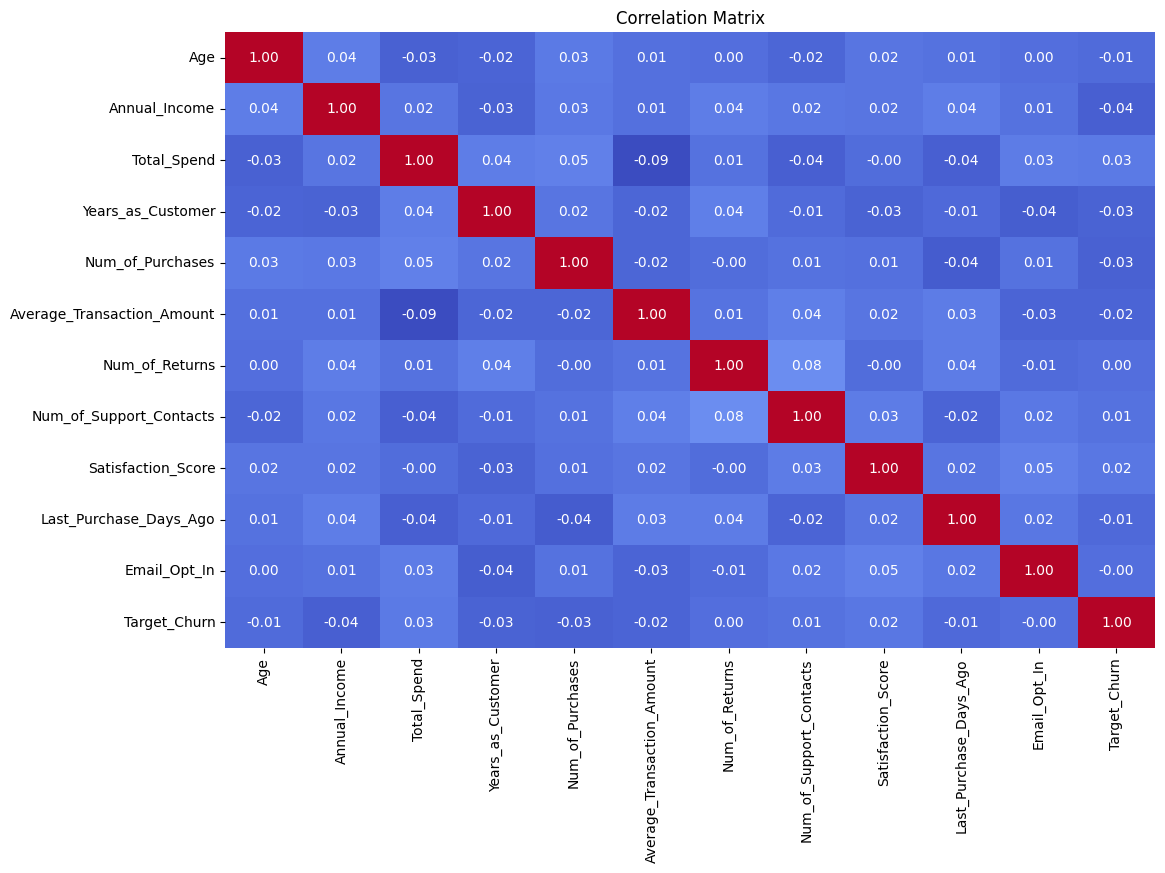

Top Correlated Features with Churn:
 Target_Churn                  1.000000
Total_Spend                   0.028659
Satisfaction_Score            0.022567
Num_of_Support_Contacts       0.009593
Num_of_Returns                0.000061
Email_Opt_In                 -0.001019
Age                          -0.009260
Last_Purchase_Days_Ago       -0.013823
Average_Transaction_Amount   -0.024723
Years_as_Customer            -0.029823
Num_of_Purchases             -0.032772
Annual_Income                -0.036322
Name: Target_Churn, dtype: float64


In [18]:
df_corr = df.copy()
df_corr['Target_Churn'] = df_corr['Target_Churn'].astype(int)

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.title("Correlation Matrix")
plt.show()

# Sort correlation with Target
correlation = df_corr.corr(numeric_only=True)['Target_Churn'].sort_values(ascending=False)
print("Top Correlated Features with Churn:\n", correlation)

# Trends & Patterns

### Churn by Satisfaction Score

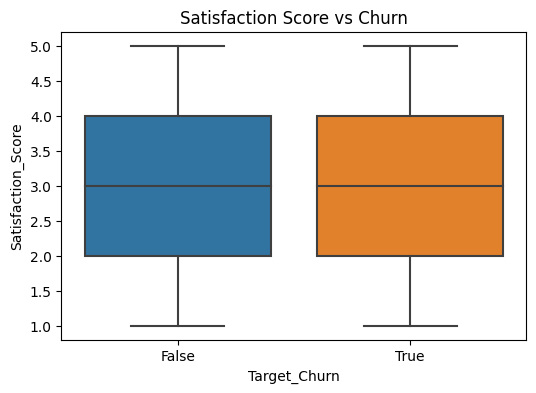

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Target_Churn', y='Satisfaction_Score')
plt.title("Satisfaction Score vs Churn")
plt.show()

### Churn by Years as Customer

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


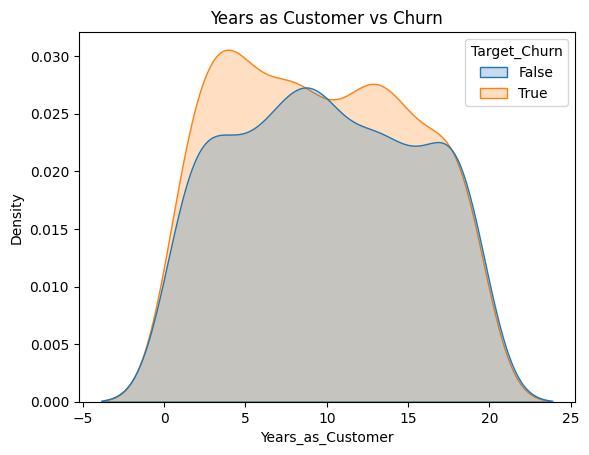

In [21]:
sns.kdeplot(data=df, x='Years_as_Customer', hue='Target_Churn', fill=True)
plt.title("Years as Customer vs Churn")
plt.show()

## Churn by Last Purchase Days Ago

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


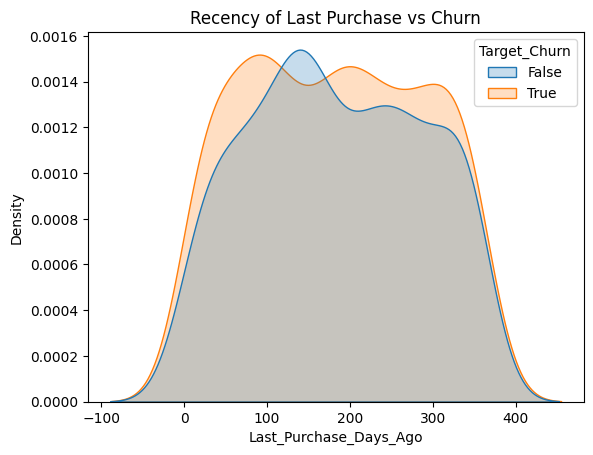

In [23]:
sns.kdeplot(data=df, x='Last_Purchase_Days_Ago', hue='Target_Churn', fill=True)
plt.title("Recency of Last Purchase vs Churn")
plt.show()